<a href="https://colab.research.google.com/github/HumanRtrUni/ml_class_assignment/blob/main/ML_LAB_8_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from numpy.linalg import pinv

# Activation Functions
def step(x): return np.where(x >= 0, 1, 0)
def bipolar_step(x): return np.where(x >= 0, 1, -1)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0, x)
def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha * x)

# Derivatives for backprop
def sigmoid_derivative(x): return x * (1 - x)

# Error Function
def sse(y_true, y_pred): return np.sum((y_true - y_pred)**2)


Converged in 9 epochs
Final weights: [-0.382978    0.22032449  0.20011437]


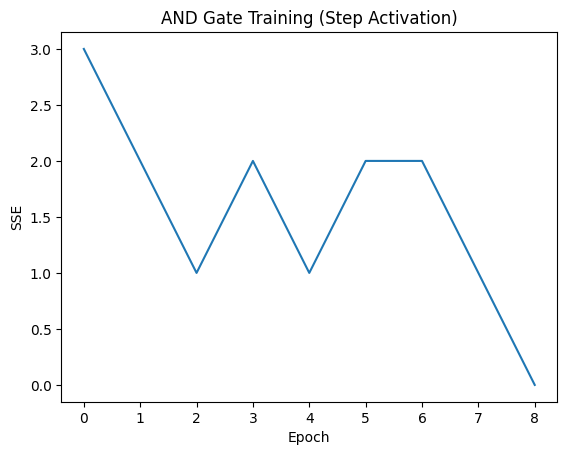

In [ ]:
# A1. Implement a custom perceptron for AND Gate
# - Implement summation unit, step activation, error comparator
# - Use Step activation function
# - Stop when SSE = 0 or max 1000 epochs
# - Plot epochs vs SSE

# AND gate dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Parameters
np.random.seed(1)
weights = np.random.rand(3)
lr = 0.1
max_epochs = 1000

errors = []
for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(X)):
        xi = np.insert(X[i], 0, 1)  # bias
        net = np.dot(xi, weights)
        output = step(net)
        error = y[i] - output
        weights += lr * error * xi
        total_error += error**2
    errors.append(total_error)
    if total_error == 0:
        print(f"Converged in {epoch+1} epochs")
        break

print("Final weights:", weights)
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.title('AND Gate Training (Step Activation)')
plt.show()


In [ ]:
# A3. Compare activation functions (AND Gate)
# - Bipolar Step
# - Sigmoid
# - ReLU
# - Keep same learning rate and initial weights
# - Compare number of iterations to converge


activations = [("Bipolar Step", bipolar_step),
               ("Sigmoid", sigmoid),
               ("ReLU", relu)]

for name, act in activations:
    w = np.random.rand(3)
    for epoch in range(max_epochs):
        total_err = 0
        for i in range(len(X)):
            xi = np.insert(X[i], 0, 1)
            net = np.dot(xi, w)
            out = act(net)
            if name == "Bipolar Step":
                target = 1 if y[i] == 1 else -1
            else:
                target = y[i]
            err = target - out
            w += lr * err * xi
            total_err += err**2
        if total_err < 1e-5:
            print(f"{name} converged in {epoch+1} epochs")
            break



Bipolar Step converged in 7 epochs
ReLU converged in 275 epochs


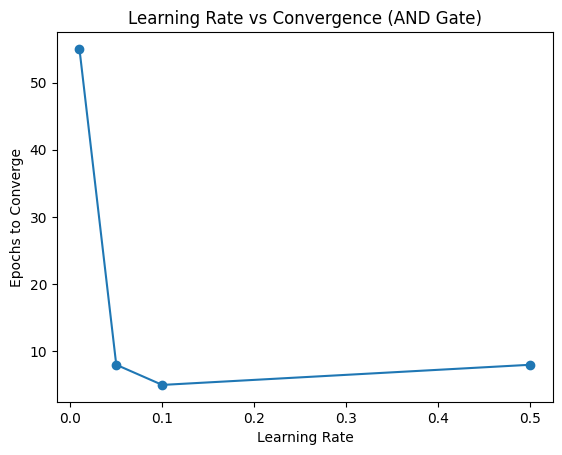

In [ ]:
# A4. Repeat A1 with different learning rates
# - Learning Rates: [0.01, 0.05, 0.1, 0.5]
# - Plot convergence vs learning rate

learning_rates = [0.01, 0.05, 0.1, 0.5]
iterations = []

for alpha in learning_rates:
    w = np.random.rand(3)
    for epoch in range(max_epochs):
        total_err = 0
        for i in range(len(X)):
            xi = np.insert(X[i], 0, 1)
            out = step(np.dot(xi, w))
            err = y[i] - out
            w += alpha * err * xi
            total_err += err**2
        if total_err == 0:
            iterations.append(epoch+1)
            break

plt.plot(learning_rates, iterations, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.title('Learning Rate vs Convergence (AND Gate)')
plt.show()


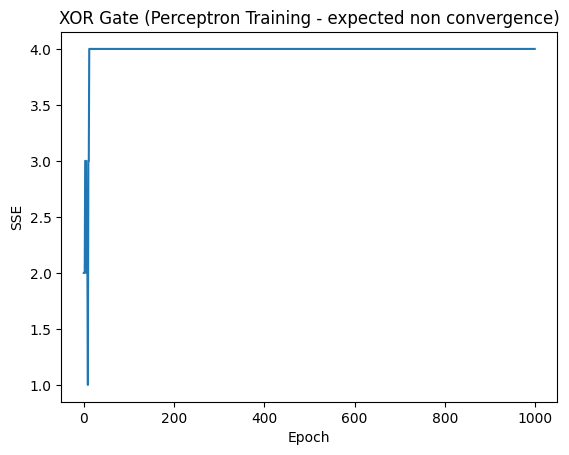

In [ ]:
# A5. Repeat A1–A3 for XOR Gate
# - Expect no convergence with single-layer perceptron

X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

w = np.random.rand(3)
err_list = []
for epoch in range(max_epochs):
    total_err = 0
    for i in range(len(X_xor)):
        xi = np.insert(X_xor[i], 0, 1)
        out = step(np.dot(xi, w))
        err = y_xor[i] - out
        w += lr * err * xi
        total_err += err**2
    err_list.append(total_err)

plt.plot(err_list)
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.title('XOR Gate (Perceptron Training - expected non convergence)')
plt.show()


In [ ]:
# A6. Customer Transaction Classification
# - Use Sigmoid activation
# - Load dataset from file
# - Classify High/Low value transactions

# A7. Compare results with matrix Pseudo-Inverse

from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  path = io.BytesIO(uploaded[fn])


df = pd.read_excel(path)
print("Dataset loaded successfully!")
print(df.head())

# Assuming last column is the target
X_tx = df.iloc[:, :-1].values
y_tx = df.iloc[:, -1].values

# Convert labels if they are categorical (e.g. Yes/No)
if y_tx.dtype == object:
    y_tx = np.where(y_tx == "Yes", 1, 0)

# Perceptron with Sigmoid Activation
w = np.random.rand(X_tx.shape[1]+1)
for epoch in range(500):
    total_err = 0
    for i in range(len(X_tx)):
        xi = np.insert(X_tx[i], 0, 1)
        out = sigmoid(np.dot(xi, w))
        err = y_tx[i] - out
        w += lr * err * xi
        total_err += err**2
    if total_err < 1e-5:
        break
print("Final weights (Perceptron):", w)

# Pseudo-inverse comparison
X_aug = np.c_[np.ones(X_tx.shape[0]), X_tx]
w_pinv = np.dot(pinv(X_aug), y_tx)
print("Pseudo-inverse weights:", w_pinv)

Saving mldataset.xlsx to mldataset (1).xlsx
User uploaded file "mldataset (1).xlsx" with length 13016 bytes
Dataset loaded successfully!
        i      ii      v1      v5  label
0  0.0145 -0.9210  0.6190  0.6995      0
1  0.0720 -0.9475  0.5790  0.7585      0
2 -0.9700 -0.9655 -0.3840 -0.1965      1
3 -1.0355 -1.0195 -0.4035 -0.2365      1
4 -0.0605 -1.0105  0.6275  0.6280      0
Final weights (Perceptron): [ 0.3188489  -5.51291606  0.95030302 -5.99669618 -5.40851842]
Pseudo-inverse weights: [ 0.82866414 -0.31814105  0.40034609 -0.547005   -0.16119522]


In [ ]:
# A8. Implement 2-layer neural network for AND Gate (Sigmoid + Backprop)
# A9. Repeat A8 for XOR Gate

def train_mlp(X, y, hidden_neurons=2, lr=0.1, max_epochs=10000):
    n_input = X.shape[1]
    n_output = 1

    w_input_hidden = np.random.rand(n_input+1, hidden_neurons)
    w_hidden_output = np.random.rand(hidden_neurons+1, n_output)

    for epoch in range(max_epochs):
        total_err = 0
        for i in range(len(X)):
            xi = np.insert(X[i], 0, 1)
            hidden_input = np.dot(xi, w_input_hidden)
            hidden_output = sigmoid(hidden_input)
            hidden_output_b = np.insert(hidden_output, 0, 1)

            final_input = np.dot(hidden_output_b, w_hidden_output)
            final_output = sigmoid(final_input)

            err = y[i] - final_output
            total_err += err**2

            d_output = err * sigmoid_derivative(final_output)
            d_hidden = sigmoid_derivative(hidden_output) * np.dot(w_hidden_output[1:], d_output)

            w_hidden_output += lr * np.outer(hidden_output_b, d_output)
            w_input_hidden += lr * np.outer(xi, d_hidden)

        if total_err < 1e-5:
            print(f"Converged in {epoch+1} epochs")
            break
    return w_input_hidden, w_hidden_output

# Train for AND
train_mlp(X, y, hidden_neurons=2)

# Train for XOR
train_mlp(X_xor, y_xor, hidden_neurons=2)


(array([[-2.37088357, -5.68306004],
        [ 5.70997625,  3.71124048],
        [ 5.73051121,  3.71443768]]),
 array([[-3.35018553],
        [ 7.40687272],
        [-7.99350887]]))

In [ ]:
# A11. Use scikit-learn MLPClassifier() for AND & XOR Gates
# A12. Use MLPClassifier() for Project Dataset

# AND
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp_and.fit(X, y)
print("MLPClassifier (AND):", mlp_and.predict(X))

# XOR
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp_xor.fit(X_xor, y_xor)
print("MLPClassifier (XOR):", mlp_xor.predict(X_xor))

# Project dataset
mlp_proj = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=1000)
mlp_proj.fit(X_tx, y_tx)
print("MLPClassifier (Project Data):", mlp_proj.predict(X_tx))


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier (AND): [0 0 0 0]
MLPClassifier (XOR): [1 1 1 1]
MLPClassifier (Project Data): [0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0
 1]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
